In [2]:
import pandas as pd
import json
import requests as rq
import numpy as np


import warnings
warnings.filterwarnings("ignore")


In [3]:
def crear_pd_xb():
    #Creamos el DataFrame de Xbox

    url = 'https://api.sampleapis.com/xbox/games'
    response = rq.get(url)
    a = response.json()

    id = []
    name = []
    genre= []
    developers =[]
    rdJapan=[]
    rdNorthAmerica=[]
    rdEurope=[]
    rdAustralia=[]

    for x in a:
        id.append(x['id'])
        name.append(x['name'])
        genre.append(x['genre'])
        developers.append(x['developers'])
        y= x['releaseDates']
        rdJapan.append(y['Japan'])
        rdNorthAmerica.append(y['NorthAmerica'])
        rdEurope.append(y['Europe'])
        rdAustralia.append(y['Australia'])

    dict_xbox={'id':id,'name':name,'genre':genre,'rdJapan':rdJapan,'rdNorthAmerica':rdNorthAmerica,'rdEurope':rdEurope,'rdAustralia':rdAustralia}
    pd_xbox = pd.DataFrame(dict_xbox)
    return pd_xbox

In [4]:
pd_xbox = crear_pd_xb()

In [5]:
def crear_pd_sw():
    #Creamos el DataFrame de Switch

    url1 = 'https://api.sampleapis.com/switch/games'
    response = rq.get(url1)
    a1 = response.json()

    id = []
    name = []
    genre= []
    developers =[]
    rdJapan=[]
    rdNorthAmerica=[]
    rdEurope=[]
    rdAustralia=[]

    for x in a1:
        id.append(x['id'])
        name.append(x['name'])
        genre.append(x['genre'])
        developers.append(x['developers'])
        y= x['releaseDates']
        rdJapan.append(y['Japan'])
        rdNorthAmerica.append(y['NorthAmerica'])
        rdEurope.append(y['Europe'])
        rdAustralia.append(y['Australia'])

    dict={'id':id,'name':name,'genre':genre,'rdJapan':rdJapan,'rdNorthAmerica':rdNorthAmerica,'rdEurope':rdEurope,'rdAustralia':rdAustralia}
    pd_switch = pd.DataFrame(dict)
    return pd_switch

In [6]:
pd_switch = crear_pd_sw()

In [7]:
def crear_pd_ps():
    url2 = 'https://api.sampleapis.com/playstation/games'
    response = rq.get(url2)
    a2 = response.json()

    id = []
    name = []
    genre= []
    developers =[]
    rdJapan=[]
    rdNorthAmerica=[]
    rdEurope=[]
    rdAustralia=[]

    for x in a2:
        id.append(x['id'])
        name.append(x['name'])
        genre.append(x['genre'])
        developers.append(x['developers'])
        y= x['releaseDates']
        rdJapan.append(y['Japan'])
        rdNorthAmerica.append(y['NorthAmerica'])
        rdEurope.append(y['Europe'])
        rdAustralia.append(y['Australia'])

    dict={'id':id,'name':name,'genre':genre,'rdJapan':rdJapan,'rdNorthAmerica':rdNorthAmerica,'rdEurope':rdEurope,'rdAustralia':rdAustralia}
    pd_playstation = pd.DataFrame(dict)
    return pd_playstation

In [8]:
pd_playstation = crear_pd_ps()

In [9]:
#Acabamos de comprobar si hay videojuegos que no están catalogados en la categoría genero
#En el pd_xbox y pd_playstation vamos a cambiar aquellos que tengan una observacion de tipo lista '[]' por '['Sin genero']' 
#para después poder utilizarlas en las comparaciones

In [10]:
def arreglar_genre_xb(pd_xbox):
    pd_xbox.genre[pd_xbox.genre.isin([[]])]= [['Sin genero']]
    genre=[]
    for x in pd_xbox.iloc[:,2]:
        if x =='Sin genero':
            genre.append('Sin genero')
        else:
            genre.append(x[0])
    del(pd_xbox['genre'])
    pd_xbox['genre']=genre
    return pd_xbox

In [11]:
pd_xbox=arreglar_genre_xb(pd_xbox)

In [12]:
def arreglar_genre_ps(pd_playstation):
    pd_playstation.genre[pd_playstation.genre.isin([[]])]= [['Sin genero']]
    genre=[]
    for x in pd_playstation.iloc[:,2]:
        if x =='Sin genero':
            genre.append('Sin genero')
        else:
            genre.append(x[0])
    del(pd_playstation['genre'])
    pd_playstation['genre']=genre
    return pd_playstation


In [13]:
pd_playstation=arreglar_genre_ps(pd_playstation)

In [14]:

def arreglar_genre_sw(pd_switch):
    genre = []
    for x in pd_switch.iloc[:,2]:
        if x =='Sin genero':
            genre.append('Sin genero')
        else:
            genre.append(x[0])
    del(pd_switch['genre'])
    pd_switch['genre']=genre
    return pd_switch

In [15]:
pd_switch = arreglar_genre_sw(pd_switch)

In [16]:
#Corregido ya el genero para que solo salga el genero y sea de tipo string vamos a solucionar el tema de las fechas
# Para ello vamos a generar una nueva columna que tendrá como valores Norte America, Europa o Ambos según haya salido primero en 
#Norte América, Europa o en ambos respectivamente
# Con este fin, modificaremos las columnas rdNorthAmerica y rdEurope para que sean más fácil comprobar cual salió antes

In [17]:
#Tambien arreglaremos las columnas de rdJapan y rdAustralia

In [18]:
#Hay fechas de lanzamiento que tienen TBA entre otras como dato o Unreleased, por lo que vamos a modificar dichos datos
#haciendo que donde ponga 'Unreleased' aparezca un '0' (puesto que unreleased= no ha salido en ingles)
# y sustituyendo el resto de los datos por np.NaN
#para despues hacer un dropna(inplace=True)

In [19]:
#Crearemos una lista nueva por cada columna donde almacenaremos los datos de la siguiente forma[año,mes,dia]
#Aquellos datos que vengan dados por un '0' lo introduciremos en la lista como [año=3000,mes = 0 , dia=0]
#Para poder compararlos con mayor facilidad

In [20]:
def arreglar_ps (pd_playstation):
    pd_playstation.rdEurope[pd_playstation['rdEurope'].isin(['TBA','Assorted','Q3 2020'])]=np.NAN
    pd_playstation.rdNorthAmerica[pd_playstation['rdNorthAmerica'].isin(['TBA','Assorted','Q3 2020'])]=np.NAN
    pd_playstation.rdJapan[pd_playstation['rdJapan'].isin(['TBA','Assorted','Q3 2020'])]=np.NAN
    pd_playstation.rdAustralia[pd_playstation['rdAustralia'].isin(['TBA','Assorted','Q3 2020'])]=np.NAN
    pd_playstation.rdEurope[pd_playstation['rdEurope'].isin(['Unreleased'])]='0'
    pd_playstation.rdJapan[pd_playstation['rdJapan'].isin(['Unreleased'])]='0'
    pd_playstation.rdAustralia[pd_playstation['rdAustralia'].isin(['Unreleased'])]='0'
    pd_playstation.rdNorthAmerica[pd_playstation['rdNorthAmerica'].isin(['Unreleased'])]='0'
    pd_playstation.dropna(inplace=True)
    return pd_playstation


In [21]:
pd_playstation=arreglar_ps(pd_playstation)

In [22]:
# Nos encontramos una fecha que no sabemos lo que significa, conque la vamos a eliminar más arriba

In [23]:
#pd_playstation.iat[674,4] = 'Q3 2020'

In [24]:
def comparador_fechas(Eu,Na): #devolverá una lista de strings donde pondrá NA,EU o NA EU
    fechas_comparadas=[]
    for x in range(len(Eu)):
        
        if Eu[x][0]>Na[x][0]:
            fechas_comparadas.append('NA')
        elif  Eu[x][0]<Na[x][0]:
            fechas_comparadas.append('EU')
        elif (Eu[x][0]==Na[x][0]) & (Eu[x][1]>Na[x][1]):
            fechas_comparadas.append('NA')
        elif (Eu[x][0]==Na[x][0])& (Eu[x][1]<Na[x][1]):
            fechas_comparadas.append('EU')
        elif (Eu[x][0]==Na[x][0]) & (Eu[x][1]==Na[x][1])&(Eu[x][2]>Na[x][2]):
            fechas_comparadas.append('NA')
        elif (Eu[x][0]==Na[x][0])& (Eu[x][1]==Na[x][1])&(Eu[x][2]<Na[x][2]):
            fechas_comparadas.append('EU')
        elif (Eu[x][0]==Na[x][0] )& (Eu[x][1]==Na[x][1]) & (Eu[x][2]==Na[x][2]) :
            fechas_comparadas.append('NA EU')
    return fechas_comparadas
            


In [25]:
def comparador_fechas_str(a1,a2,lista): #devolverá una lista de strings donde pondrá NA,EU o NA EU
    fecha=''    
    if a1[0]>a2[0]:
        fecha=lista[1]
    elif a1[0]<a2[0]:
            fecha=lista[0]
    elif (a1[0]==a2[0]) & (a1[1]>a2[1]):
        fecha= lista[1]
    elif (a1[0]==a2[0])& (a1[1]<a2[1]):
        fecha = lista[0]
    elif (a1[0]==a2[0]) & (a1[1]==a2[1])&(a1[2]>a2[2]):
        fecha=lista[1]
    elif (a1[0]==a2[0]) & (a1[1]==a2[1])&(a1[2]<a2[2]):
        fecha=lista[0]
    else:
        fecha=lista[0]+' '+lista[1]
        
    return fecha

In [26]:
def comparador_fechas_4(Eu,Na,Jp,Au):
    a= comparador_fechas(Eu,Na)
    for x in range(len(Eu)):
        lista = []
        lista.append(a[x])
        lista.append('JP')
        
        if 'EU' in a[x]:
            a[x] = comparador_fechas_str(Eu[x],Jp[x],lista)
        elif 'NA' in a[x]:
            a[x] = comparador_fechas_str(Na[x],Jp[x],lista)
    
    for x in range(len(Eu)):
        lista = []
        lista.append(a[x])
        lista.append('AU')
        if 'EU' in a[x]:
            a[x] = comparador_fechas_str(Eu[x],Au[x],lista)
        elif 'NA' in a[x]:
            a[x] = comparador_fechas_str(Na[x],Au[x],lista)
        elif 'JP' in a[x]:
            a[x] = comparador_fechas_str(Na[x],Au[x],lista)
    
    return a
        

    

In [27]:
def lista_Comp_ps (pd_playstation):
    meses = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    fecha_Na_ps =[]
    for x in pd_playstation.iloc[:,3]:
        fecha=[]
        if x =='0':
            fecha.append(3000)
            fecha.append(0)
            fecha.append(0)
        elif len(x)>8:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                        fecha.append(y)
            fecha.append(int(x[4:-6]))
        elif len(x)>4 &len(x)<9:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(0)
        else:
        
            fecha.append(int(x))
            fecha.append(0)
            fecha.append(0)
        fecha_Na_ps.append(fecha)

    fecha_Eu_ps =[]
    for x in pd_playstation.iloc[:,4]:
        fecha=[]
        if x =='0':
            fecha.append(3000)
            fecha.append(0)
            fecha.append(0)
        elif len(x)>8:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(int(x[4:-6]))
        elif len(x)>4 &len(x)<9:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(0)
        else:
        
            fecha.append(int(x))
            fecha.append(0)
            fecha.append(0)
        fecha_Eu_ps.append(fecha) 

    fecha_Jp_ps =[]
    for x in pd_playstation.iloc[:,2]:
        fecha=[]
        if x =='0':
            fecha.append(3000)
            fecha.append(0)
            fecha.append(0)
        elif len(x)>8:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(int(x[4:-6]))
        elif len(x)>4 &len(x)<9:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(0)
        else:
            fecha.append(int(x))
            fecha.append(0)
            fecha.append(0)
        fecha_Jp_ps.append(fecha)

    fecha_Au_ps =[]
    for x in pd_playstation.iloc[:,5]:
        fecha=[]
        if x =='0':
            fecha.append(3000)
            fecha.append(0)
            fecha.append(0)
        elif len(x)>8:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(int(x[4:-6]))
        elif len(x)>4 &len(x)<9:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(0)
        else:
        
            fecha.append(int(x))
            fecha.append(0)
            fecha.append(0)
        fecha_Au_ps.append(fecha)

    lista = comparador_fechas_4(fecha_Eu_ps,fecha_Na_ps,fecha_Jp_ps,fecha_Au_ps)
    a= [lista,fecha_Eu_ps,fecha_Na_ps,fecha_Jp_ps,fecha_Au_ps]
    return a


In [28]:
lista_ps =lista_Comp_ps(pd_playstation)
pd_playstation['Comp']= lista_ps[0]

In [29]:
def arreglar_xbox(pd_xbox):
    pd_xbox.rdEurope[pd_xbox['rdEurope'].isin(['TBA','Assorted','Q3 2020','Early Access',"Error in Template:Date table sorting: 'Dex' is not a valid month"])]=np.NAN
    pd_xbox.rdNorthAmerica[pd_xbox['rdNorthAmerica'].isin(['TBA','Assorted','Early Access','Q3 2020'])]=np.NAN
    pd_xbox.rdJapan[pd_xbox['rdJapan'].isin(['TBA','Assorted','Early Access','Q3 2020'])]=np.NAN
    pd_xbox.rdAustralia[pd_xbox['rdAustralia'].isin(['TBA','Assorted','Early Access','Q3 2020'])]=np.NAN
    pd_xbox.rdEurope[pd_xbox['rdEurope'].isin(['Unreleased'])]='0'
    pd_xbox.rdNorthAmerica[pd_xbox['rdNorthAmerica'].isin(['Unreleased'])]='0'
    pd_xbox.rdJapan[pd_xbox['rdJapan'].isin(['Unreleased'])]='0'
    pd_xbox.rdAustralia[pd_xbox['rdAustralia'].isin(['Unreleased'])]='0'
    pd_xbox.dropna(inplace=True)
    return pd_xbox


In [30]:
pd_xbox=arreglar_xbox(pd_xbox)


In [31]:
def lista_Comp_xb (pd_xbox):
    fecha_Na_xbox =[]
    meses = ['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
    for x in pd_xbox.iloc[:,3]:
        fecha=[]
        if x =='0':
            fecha.append(3000)
            fecha.append(0)
            fecha.append(0)
        elif len(x)>8:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(int(x[4:-6]))
        elif len(x)>4 &len(x)<9:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(0)
        else:
        
            fecha.append(int(x))
            fecha.append(0)
            fecha.append(0)
        fecha_Na_xbox.append(fecha)

    fecha_Eu_xbox =[]
    for x in pd_xbox.iloc[:,4]:
        fecha=[]
        if x =='0':
            fecha.append(3000)
            fecha.append(0)
            fecha.append(0)
        elif len(x)>8:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(int(x[4:-6]))
        elif len(x)>4 &len(x)<9:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(0)
        else:
        
            fecha.append(int(x))
            fecha.append(0)
            fecha.append(0)

        fecha_Eu_xbox.append(fecha)     

    fecha_Jp_xbox =[]
    for x in pd_xbox.iloc[:,2]:
        fecha=[]
        if x =='0':
            fecha.append(3000)
            fecha.append(0)
            fecha.append(0)
        elif len(x)>8:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(int(x[4:-6]))
        elif len(x)>4 &len(x)<9:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(0)
        else:
        
            fecha.append(int(x))
            fecha.append(0)
            fecha.append(0)

        fecha_Jp_xbox.append(fecha) 

    fecha_Au_xbox =[]
    for x in pd_xbox.iloc[:,5]:
        fecha=[]
        if x =='0':
            fecha.append(3000)
            fecha.append(0)
            fecha.append(0)
        elif len(x)>8:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(int(x[4:-6]))
        elif len(x)>4 &len(x)<9:
            fecha.append(int(x[-4:]))
            for y in range(1,13):
                if meses[y-1]==x[0:3]:
                    fecha.append(y)
            fecha.append(0)
        else:
        
            fecha.append(int(x))
            fecha.append(0)
            fecha.append(0)

        fecha_Au_xbox.append(fecha) 
    lista = comparador_fechas_4(fecha_Eu_xbox,fecha_Na_xbox,fecha_Jp_xbox,fecha_Au_xbox)
    a =[lista,fecha_Eu_xbox,fecha_Na_xbox,fecha_Jp_xbox,fecha_Au_xbox]
    return a

In [32]:
lista_xb = lista_Comp_xb(pd_xbox)
pd_xbox['Comp']= lista_xb[0]

In [33]:
def arreglar_sw(pd_switch):
    pd_switch.rdEurope[pd_switch['rdEurope'].isin(['TBA','Assorted','Q3 2020','Early Access',"Error in Template:Date table sorting: 'Dex' is not a valid month"])]=np.NAN
    pd_switch.rdNorthAmerica[pd_switch['rdNorthAmerica'].isin(['TBA','Assorted','Early Access','Q3 2020'])]=np.NAN
    pd_switch.rdJapan[pd_switch['rdJapan'].isin(['TBA','Assorted','Early Access','Q3 2020'])]=np.NAN
    pd_switch.rdAustralia[pd_switch['rdAustralia'].isin(['TBA','Assorted','Early Access','Q3 2020'])]=np.NAN
    pd_switch.rdEurope[pd_switch['rdEurope'].isin(['Unreleased'])]='0'
    pd_switch.rdJapan[pd_switch['rdJapan'].isin(['Unreleased'])]='0'
    pd_switch.rdAustralia[pd_switch['rdAustralia'].isin(['Unreleased'])]='0'
    pd_switch.rdNorthAmerica[pd_switch['rdNorthAmerica'].isin(['Unreleased'])]='0'
    pd_switch.dropna(inplace=True)
    return pd_switch


In [34]:
pd_switch=arreglar_sw(pd_switch)

In [35]:
def lista_Comp_sw (pd_switch):
    fecha_Na_sw =[]
    meses = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
    for x in pd_switch.iloc[:,3]:
    
        fecha1=[]
        if x == '0':
            fecha1.append(3000)
            fecha1.append(0)
            fecha1.append(0)
        elif len(x)==4:
            fecha1.append(int(x))
            fecha1.append(0)
            fecha1.append(0)
        elif not(','in x):
            fecha=x.split()
            for y in range(1,13):
                if meses[y-1]==fecha[0]:
                    fecha[0]=y
            fecha1.append(int(fecha[1]))
            fecha1.append(fecha[0])
            fecha1.append(0)
        else:
            fecha=x.split()
            for y in range(1,13):
                if meses[y-1]==fecha[0]:
                    fecha[0]=y
            fecha1.append(int(fecha[2]))
            fecha1.append(fecha[0])
            fecha1.append(int(fecha[1].replace(',','')))
        fecha_Na_sw.append(fecha1)

    fecha_Eu_sw =[]
    for x in pd_switch.iloc[:,4]:
        fecha1=[]
        if x == '0':
            fecha1.append(3000)
            fecha1.append(0)
            fecha1.append(0)
        elif len(x)==4:
            fecha1.append(int(x))
            fecha1.append(0)
            fecha1.append(0)
        elif not(','in x):
            fecha=x.split()
            for y in range(1,13):
                if meses[y-1]==fecha[0]:
                    fecha[0]=y
            fecha1.append(int(fecha[1]))
            fecha1.append(fecha[0])
            fecha1.append(0)
        else:   
            fecha=x.split()
            for y in range(1,13):
                if meses[y-1]==fecha[0]:
                    fecha[0]=y
            fecha1.append(int(fecha[2]))
            fecha1.append(fecha[0])
            fecha1.append(int(fecha[1].replace(',','')))
        fecha_Eu_sw.append(fecha1)  

    fecha_Jp_sw=[]
    for x in pd_switch.iloc[:,2]:
        fecha1=[]
        if x == '0':
            fecha1.append(3000)
            fecha1.append(0)
            fecha1.append(0)
        elif len(x)==4:
            fecha1.append(int(x))
            fecha1.append(0)
            fecha1.append(0)
        elif not(','in x):
            fecha=x.split()
            for y in range(1,13):
                if meses[y-1]==fecha[0]:
                    fecha[0]=y
            fecha1.append(int(fecha[1]))
            fecha1.append(fecha[0])
            fecha1.append(0)
        else:
            fecha=x.split()
            for y in range(1,13):
                if meses[y-1]==fecha[0]:
                    fecha[0]=y
            fecha1.append(int(fecha[2]))
            fecha1.append(fecha[0])
            fecha1.append(int(fecha[1].replace(',','')))
        fecha_Jp_sw.append(fecha1)  

    fecha_Au_sw =[]
    for x in pd_switch.iloc[:,5]:
        fecha1=[]
        if x  == '0':
            fecha1.append(3000)
            fecha1.append(0)
            fecha1.append(0)
        elif len(x)==4:
            fecha1.append(int(x))
            fecha1.append(0)
            fecha1.append(0)
        elif not(','in x):
            fecha=x.split()
            for y in range(1,13):
                if meses[y-1]==fecha[0]:
                    fecha[0]=y
            fecha1.append(int(fecha[1]))
            fecha1.append(fecha[0])
            fecha1.append(0)
        else:
            fecha=x.split()
            for y in range(1,13):
                if meses[y-1]==fecha[0]:
                    fecha[0]=y
            fecha1.append(int(fecha[2]))
            fecha1.append(fecha[0])
            fecha1.append(int(fecha[1].replace(',','')))
        fecha_Au_sw.append(fecha1)  
    lista = comparador_fechas_4(fecha_Eu_sw,fecha_Na_sw,fecha_Jp_sw,fecha_Au_sw)
    a= [lista,fecha_Eu_sw,fecha_Na_sw,fecha_Jp_sw,fecha_Au_sw]
    return a

In [36]:
lista_sw=lista_Comp_sw(pd_switch)
pd_switch['Comp']= lista_sw[0]

In [37]:
def delete(pd_playstation):
    del(pd_playstation['rdAustralia'])
    del(pd_playstation['rdEurope']) 
    del(pd_playstation['rdJapan'])
    del(pd_playstation['rdNorthAmerica'])
    return pd_playstation

In [38]:
pd_playstation =delete(pd_playstation)
pd_switch=delete(pd_switch)
pd_xbox=delete(pd_xbox)

In [39]:
def lista_fechas(lista):
    fecha=[[],[],[]]
    for x in lista:
        fecha[0].append(x[0])
        fecha[1].append(x[1])
        fecha[2].append(x[2])
    return fecha

In [40]:
def pd_ps_final(pd_playstation,lista_ps):
    afecha_ps_Eu = lista_fechas(lista_ps[1])
    afecha_ps_Na = lista_fechas(lista_ps[2])
    afecha_ps_Jp = lista_fechas(lista_ps[3])
    afecha_ps_Au = lista_fechas(lista_ps[4])

    pd_playstation['Año Eu'] = afecha_ps_Eu[0]
    pd_playstation['Mes Eu'] = afecha_ps_Eu[1]
    pd_playstation['Dia Eu'] = afecha_ps_Eu[2]
    pd_playstation['Año Na'] = afecha_ps_Na[0]
    pd_playstation['Mes Na'] = afecha_ps_Na[1]
    pd_playstation['Dia Na'] = afecha_ps_Na[2]
    pd_playstation['Año Jp'] = afecha_ps_Jp[0]
    pd_playstation['Mes Jp'] = afecha_ps_Jp[1]
    pd_playstation['Dia Jp'] = afecha_ps_Jp[2]
    pd_playstation['Año Au'] = afecha_ps_Au[0]
    pd_playstation['Mes Au'] = afecha_ps_Au[1]
    pd_playstation['Dia Au'] = afecha_ps_Au[2]
    return pd_playstation

In [41]:
pd_playstation = pd_ps_final(pd_playstation,lista_ps)

In [42]:
def pd_xb_final(pd_xbox,lista_xb):
    afecha_xb_Eu = lista_fechas(lista_xb[1])
    afecha_xb_Na = lista_fechas(lista_xb[2])
    afecha_xb_Jp = lista_fechas(lista_xb[3])
    afecha_xb_Au = lista_fechas(lista_xb[4])

    pd_xbox['Año Eu'] = afecha_xb_Eu[0]
    pd_xbox['Mes Eu'] = afecha_xb_Eu[1]
    pd_xbox['Dia Eu'] = afecha_xb_Eu[2]
    pd_xbox['Año Na'] = afecha_xb_Na[0]
    pd_xbox['Mes Na'] = afecha_xb_Na[1]
    pd_xbox['Dia Na'] = afecha_xb_Na[2]
    pd_xbox['Año Jp'] = afecha_xb_Jp[0]
    pd_xbox['Mes Jp'] = afecha_xb_Jp[1]
    pd_xbox['Dia Jp'] = afecha_xb_Jp[2]
    pd_xbox['Año Au'] = afecha_xb_Au[0]
    pd_xbox['Mes Au'] = afecha_xb_Au[1]
    pd_xbox['Dia Au'] = afecha_xb_Au[2]
    return pd_xbox

In [43]:
pd_xbox= pd_xb_final(pd_xbox,lista_xb)

In [44]:
def pd_sw_final (pd_switch,lista_sw):
    afecha_sw_Eu = lista_fechas(lista_sw[1])
    afecha_sw_Na = lista_fechas(lista_sw[2])
    afecha_sw_Jp = lista_fechas(lista_sw[3])
    afecha_sw_Au = lista_fechas(lista_sw[4])

    pd_switch['Año Eu'] = afecha_sw_Eu[0]
    pd_switch['Mes Eu'] = afecha_sw_Eu[1]
    pd_switch['Dia Eu'] = afecha_sw_Eu[2]
    pd_switch['Año Na'] = afecha_sw_Na[0]
    pd_switch['Mes Na'] = afecha_sw_Na[1]
    pd_switch['Dia Na'] = afecha_sw_Na[2]
    pd_switch['Año Jp'] = afecha_sw_Jp[0]
    pd_switch['Mes Jp'] = afecha_sw_Jp[1]
    pd_switch['Dia Jp'] = afecha_sw_Jp[2]
    pd_switch['Año Au'] = afecha_sw_Au[0]
    pd_switch['Mes Au'] = afecha_sw_Au[1]
    pd_switch['Dia Au'] = afecha_sw_Au[2]
    return pd_switch

In [45]:
pd_switch =pd_sw_final (pd_switch,lista_sw)

In [46]:
pd_xbox['plataforma']='xbox'
pd_playstation['plataforma']='playstation'
pd_switch['plataforma']='switch'

In [47]:
def crear_df(pd_playstation,pd_switch,pd_xbox):
    df = pd.concat([pd_playstation,pd_switch,pd_xbox],ignore_index=True)
    df['Dia Eu'] = df['Dia Eu'].astype('str')
    df['Dia Jp'] = df['Dia Jp'].astype('str')
    df['Dia Na'] = df['Dia Na'].astype('str')
    df['Dia Au'] = df['Dia Au'].astype('str')
    df['Año Eu'] = df['Año Eu'].astype('str')
    df['Año Jp'] = df['Año Jp'].astype('str')
    df['Año Na'] = df['Año Na'].astype('str')
    df['Año Au'] = df['Año Au'].astype('str')
    df['Mes Eu'] = df['Mes Eu'].astype('str')
    df['Mes Jp'] = df['Mes Jp'].astype('str')
    df['Mes Na'] = df['Mes Na'].astype('str')
    df['Mes Au'] = df['Mes Au'].astype('str')
    return df

In [48]:
df = crear_df(pd_playstation,pd_switch,pd_xbox)
df.id=1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4281 entries, 0 to 4280
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          4281 non-null   int64 
 1   name        4281 non-null   object
 2   genre       4281 non-null   object
 3   Comp        4281 non-null   object
 4   Año Eu      4281 non-null   object
 5   Mes Eu      4281 non-null   object
 6   Dia Eu      4281 non-null   object
 7   Año Na      4281 non-null   object
 8   Mes Na      4281 non-null   object
 9   Dia Na      4281 non-null   object
 10  Año Jp      4281 non-null   object
 11  Mes Jp      4281 non-null   object
 12  Dia Jp      4281 non-null   object
 13  Año Au      4281 non-null   object
 14  Mes Au      4281 non-null   object
 15  Dia Au      4281 non-null   object
 16  plataforma  4281 non-null   object
dtypes: int64(1), object(16)
memory usage: 568.7+ KB


In [49]:
df.to_csv('data\Videojuegos.csv',sep = ';')

#graficas

In [50]:
df.head(2)


,id,name,genre,Comp,Año Eu,Mes Eu,Dia Eu,Año Na,Mes Na,Dia Na,Año Jp,Mes Jp,Dia Jp,Año Au,Mes Au,Dia Au,plataforma
0,1,#killallzombies,Shooter,EU AU,2014,10,28,2014,11,12,3000,0,0,2014,10,28,playstation
1,1,10 Second Ninja X,Platform,NA EU AU,2016,7,19,2016,7,19,3000,0,0,2016,7,19,playstation


In [51]:
import matplotlib.pyplot as plt
import seaborn as sb


<AxesSubplot:xlabel='plataforma', ylabel='count'>

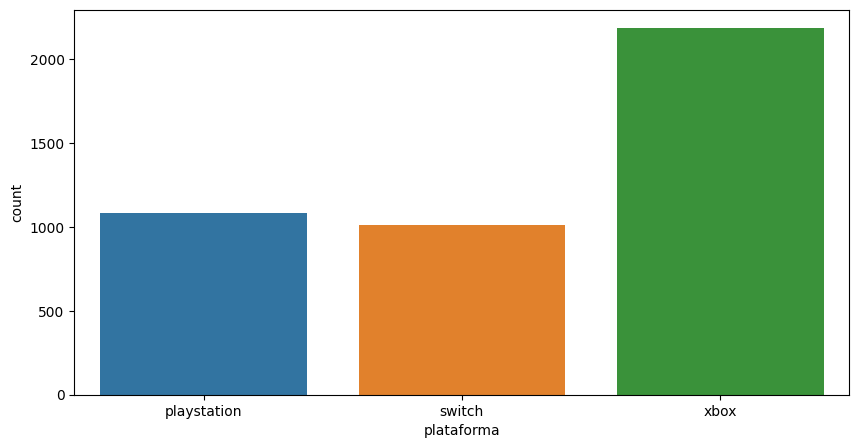

In [52]:
plt.figure(figsize=(10,5))
sb.countplot(x=df['plataforma'])

In [53]:
df1 = df.copy()
df1[df1.genre=='Sin genero']=np.NaN
df1.dropna(inplace=True)

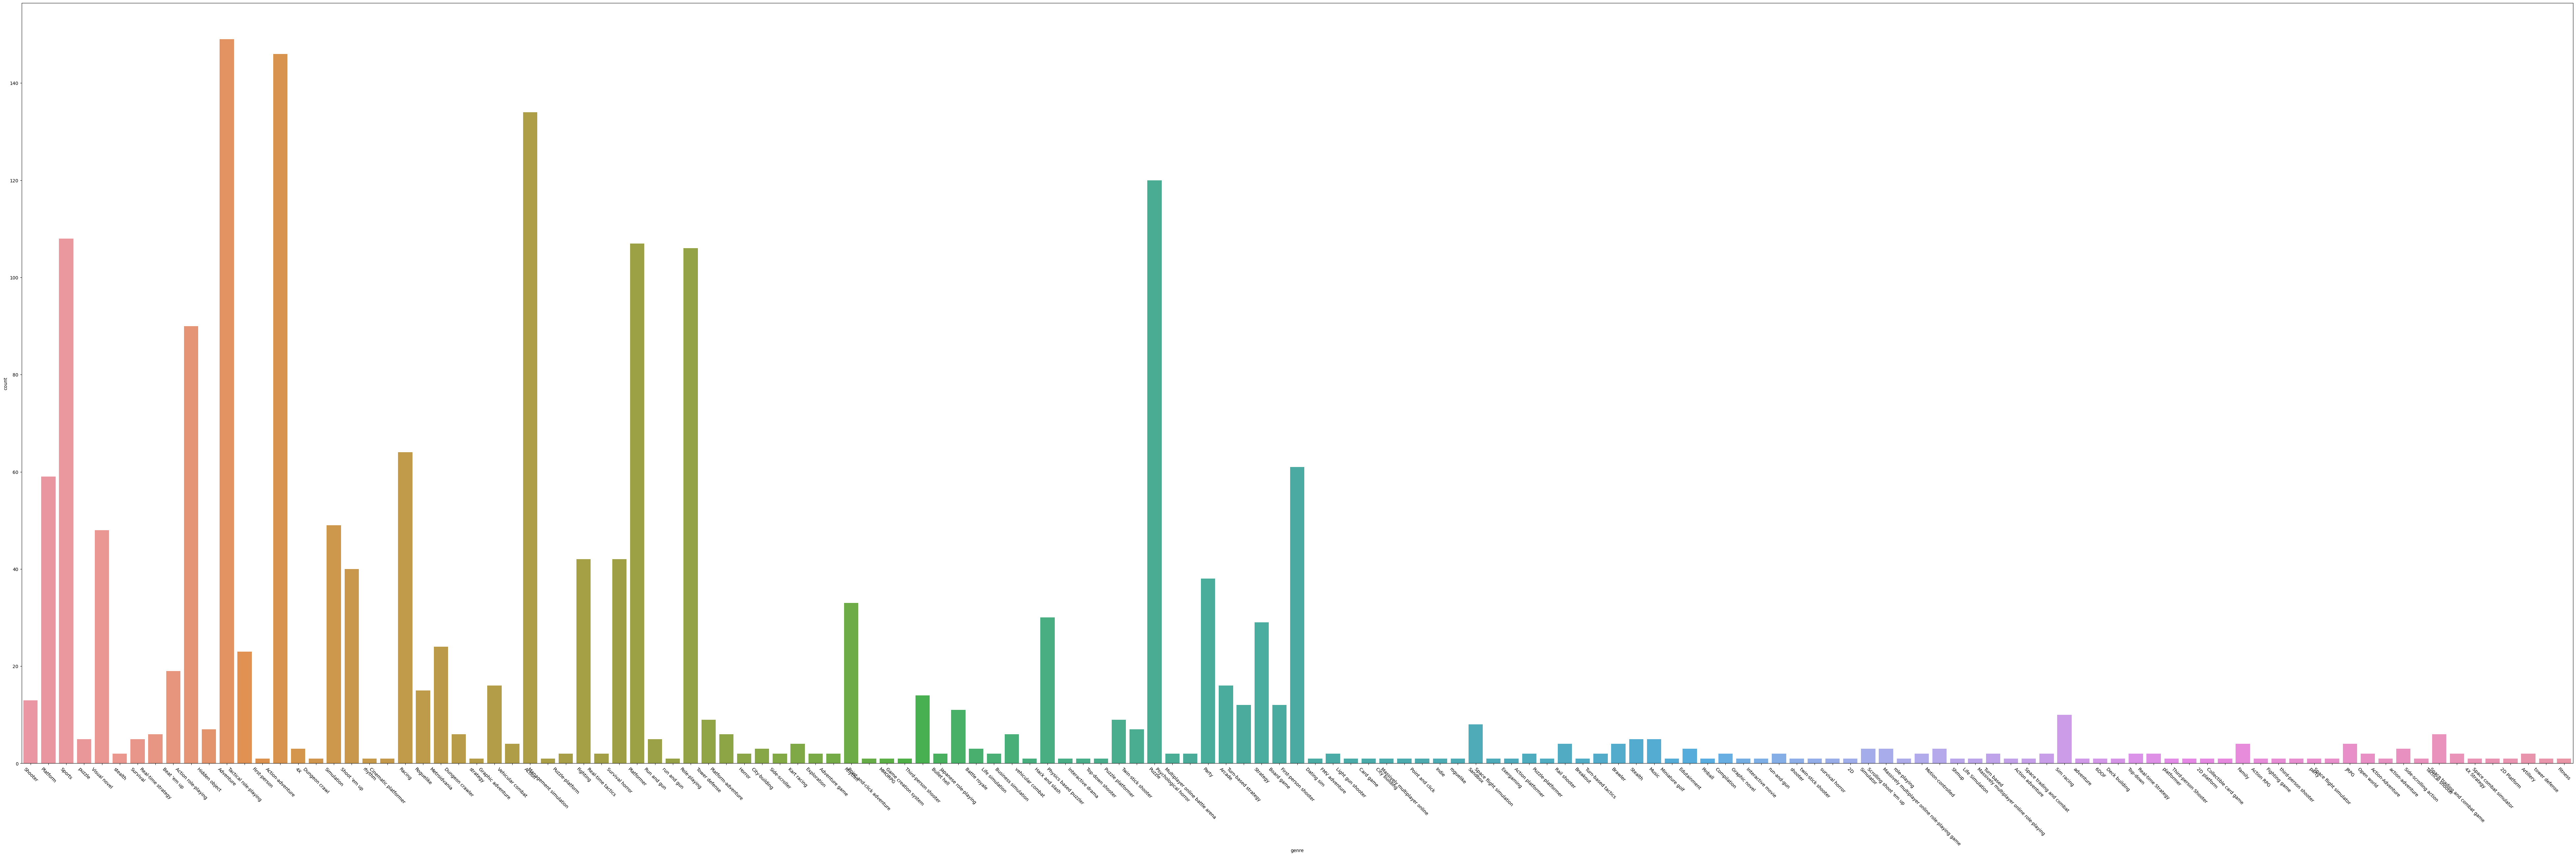

In [54]:
df1 = df.copy()
df1[df1.genre=='Sin genero']=np.NaN
df1.dropna(inplace=True)
plt.figure(figsize=(100,30))
sb.countplot(x=df1.genre)
plt.xticks(rotation=-45);

In [70]:
def juegos_mes(df):
    conteo = df['Mes Eu'].value_counts(ascending=True)
    plt.figure(figsize=(10,5))
    plt.hlines(y=conteo.index,xmin=0,xmax=conteo,color ='skyblue')
    plt.plot(conteo,conteo.index,'o')
    plt.title('Cantidad de juegos que han salido cada mes en Europa')

    conteo = df['Mes Na'].value_counts(ascending=True)
    plt.figure(figsize=(10,5))
    plt.hlines(y=conteo.index,xmin=0,xmax=conteo,color ='skyblue')
    plt.plot(conteo,conteo.index,'o')
    plt.title('Cantidad de juegos que han salido cada mes en Norte América')

    conteo = df['Mes Jp'].value_counts(ascending=True)
    plt.figure(figsize=(10,5))
    plt.hlines(y=conteo.index,xmin=0,xmax=conteo,color ='skyblue')
    plt.plot(conteo,conteo.index,'o')
    plt.title('Cantidad de juegos que han salido cada mes en Japón')

    conteo = df['Mes Au'].value_counts(ascending=True)
    plt.figure(figsize=(10,5))
    plt.hlines(y=conteo.index,xmin=0,xmax=conteo,color ='skyblue')
    plt.plot(conteo,conteo.index,'o')
    plt.title('Cantidad de juegos que han salido cada mes en Australia')

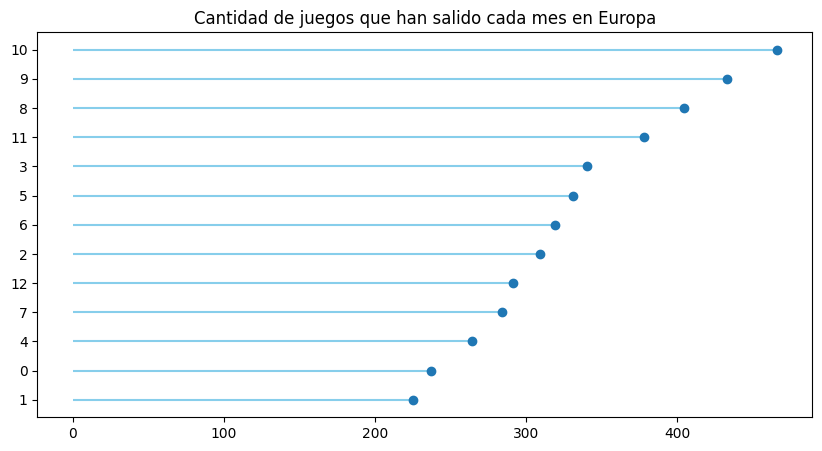

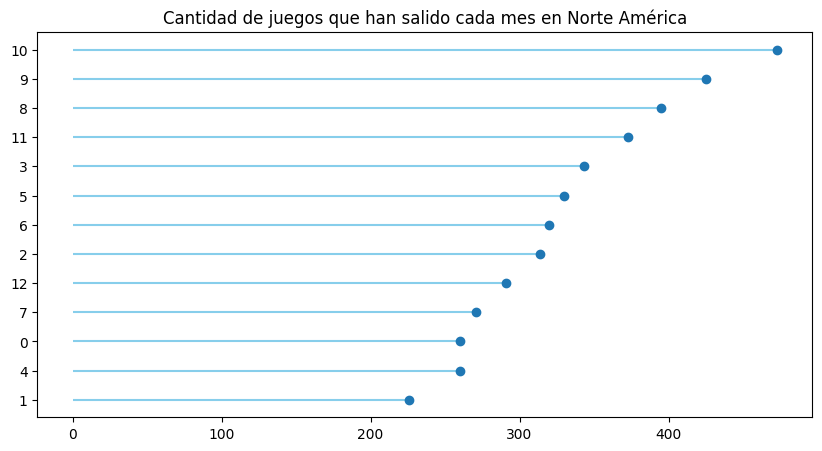

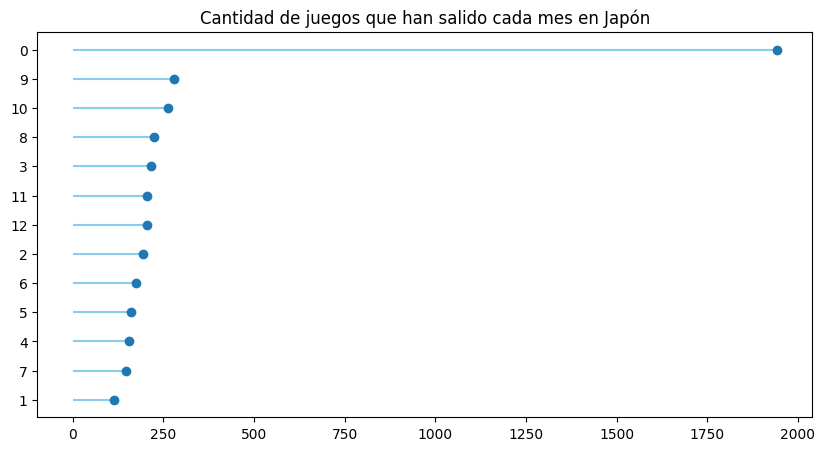

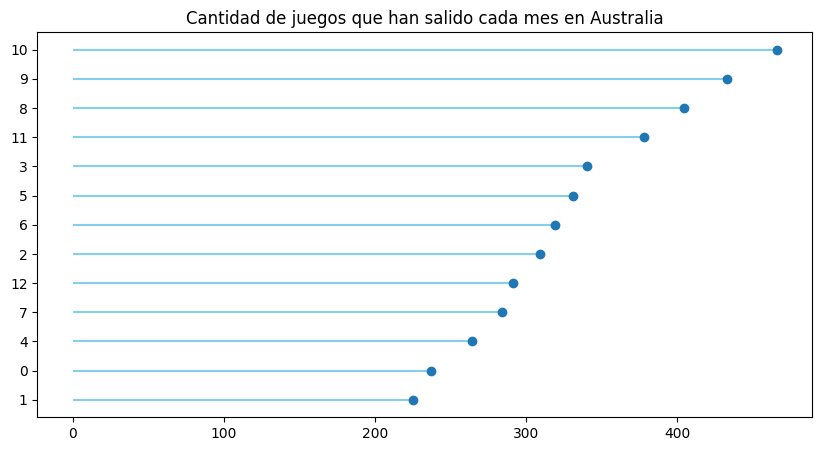

In [71]:
juegos_mes(df)

In [57]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go

In [58]:
def plataforma_year(df):
    
    df_pd = df[df['plataforma']=='playstation']
    df_xb = df[df['plataforma']=='xbox']
    df_sw = df[df['plataforma']=='switch']
    s2 = pd.DataFrame(df_xb.groupby('Año Eu').sum('id'))
    s3 = pd.DataFrame(df_sw.groupby('Año Eu').sum('id'))
    s1 = pd.DataFrame(df_pd.groupby('Año Eu').sum('id'))
    
    s1 ['Año'] = s1.index
    s2 ['Año'] = s2.index
    s3 ['Año']= s3.index
    s1[s1.Año=='3000'] = np.NaN
    s2[s2.Año=='3000'] = np.NaN
    s3[s3.Año=='3000'] = np.NaN
    s2[s2.Año=='2010'] = np.NaN
    s1.dropna(inplace=True)
    s2.dropna(inplace=True)
    s3.dropna(inplace=True)
    
    trace1 = go.Bar(x=s1.Año,y=s1.id,name='playstation', marker= dict(color='rgba(255,174,255,0.5)',line = dict(color='rgb(0,0,0)', width = 1.5)))
    trace2 = go.Bar(x=s2.Año,y=s2.id,name='xbox', marker= dict(color='rgba(255, 255, 128, 0.5)',line = dict(color='rgb(0,0,0)', width = 1.5)))
    trace3 = go.Bar(x=s3.Año,y=s3.id,name='switch', marker= dict(color='skyblue',line = dict(color='rgb(0,0,0)', width = 1.5)))
    data = [trace1,trace2,trace3]
    layout = go.Layout(title ='Cantidad de juegos que han salido en Europa, filtrado por plataformas',barmode='group')
    fig = go.Figure(data=data,layout=layout)
    iplot(fig)

    
    s2 = pd.DataFrame(df_xb.groupby('Año Jp').sum('id'))
    s3 = pd.DataFrame(df_sw.groupby('Año Jp').sum('id'))
    s1 = pd.DataFrame(df_pd.groupby('Año Jp').sum('id'))
    s1 ['Año'] = s1.index
    s2 ['Año'] = s2.index
    s3 ['Año']= s3.index
    s1[s1.Año=='3000'] = np.NaN
    s2[s2.Año=='3000'] = np.NaN
    s3[s3.Año=='3000'] = np.NaN
    s2[s2.Año=='2010'] = np.NaN
    s1.dropna(inplace=True)
    s2.dropna(inplace=True)
    s3.dropna(inplace=True)
    trace1 = go.Bar(x=s1.Año,y=s1.id,name='playstation', marker= dict(color='rgba(255,174,255,0.5)',line = dict(color='rgb(0,0,0)', width = 1.5)))
    trace2 = go.Bar(x=s2.Año,y=s2.id,name='xbox', marker= dict(color='rgba(255, 255, 128, 0.5)',line = dict(color='rgb(0,0,0)', width = 1.5)))
    trace3 = go.Bar(x=s3.Año,y=s3.id,name='switch', marker= dict(color='skyblue',line = dict(color='rgb(0,0,0)', width = 1.5)))
    data = [trace1,trace2,trace3]
    layout = go.Layout(title ='Cantidad de juegos que han salido en Japón, filtrado por plataformas',barmode='group')
    fig = go.Figure(data=data,layout=layout)
    iplot(fig)

    s2 = pd.DataFrame(df_xb.groupby('Año Au').sum('id'))
    s3 = pd.DataFrame(df_sw.groupby('Año Au').sum('id'))
    s1 = pd.DataFrame(df_pd.groupby('Año Au').sum('id'))
    
    s1 ['Año'] = s1.index
    s2 ['Año'] = s2.index
    s3 ['Año']= s3.index
    s1[s1.Año=='3000'] = np.NaN
    s2[s2.Año=='3000'] = np.NaN
    s3[s3.Año=='3000'] = np.NaN
    s2[s2.Año=='2010'] = np.NaN
    s1.dropna(inplace=True)
    s2.dropna(inplace=True)
    s3.dropna(inplace=True)
    trace1 = go.Bar(x=s1.Año,y=s1.id,name='playstation', marker= dict(color='rgba(255,174,255,0.5)',line = dict(color='rgb(0,0,0)', width = 1.5)))
    trace2 = go.Bar(x=s2.Año,y=s2.id,name='xbox', marker= dict(color='rgba(255, 255, 128, 0.5)',line = dict(color='rgb(0,0,0)', width = 1.5)))
    trace3 = go.Bar(x=s3.Año,y=s3.id,name='switch', marker= dict(color='skyblue',line = dict(color='rgb(0,0,0)', width = 1.5)))
    data = [trace1,trace2,trace3]
    layout = go.Layout(title ='Cantidad de juegos que han salido en Australia, filtrado por plataformas',barmode='group')
    fig = go.Figure(data=data,layout=layout)
    iplot(fig)
    s2 = pd.DataFrame(df_xb.groupby('Año Na').sum('id'))
    s3 = pd.DataFrame(df_sw.groupby('Año Na').sum('id'))
    s1 = pd.DataFrame(df_pd.groupby('Año Na').sum('id'))
    s1 ['Año'] = s1.index
    s2 ['Año'] = s2.index
    s3 ['Año']= s3.index
    s1[s1.Año=='3000'] = np.NaN
    s2[s2.Año=='3000'] = np.NaN
    s3[s3.Año=='3000'] = np.NaN
    s2[s2.Año=='2010'] = np.NaN
    s1.dropna(inplace=True)
    s2.dropna(inplace=True)
    s3.dropna(inplace=True)
    trace1 = go.Bar(x=s1.Año,y=s1.id,name='playstation', marker= dict(color='rgba(255,174,255,0.5)',line = dict(color='rgb(0,0,0)', width = 1.5)))
    trace2 = go.Bar(x=s2.Año,y=s2.id,name='xbox', marker= dict(color='rgba(255, 255, 128, 0.5)',line = dict(color='rgb(0,0,0)', width = 1.5)))
    trace3 = go.Bar(x=s3.Año,y=s3.id,name='switch', marker= dict(color='skyblue',line = dict(color='rgb(0,0,0)', width = 1.5)))
    data = [trace1,trace2,trace3]
    layout = go.Layout(title ='Cantidad de juegos que han salido en Norte América, filtrado por plataformas',barmode='group')
    fig = go.Figure(data=data,layout=layout)
    iplot(fig)

In [59]:
df.head(2)

,id,name,genre,Comp,Año Eu,Mes Eu,Dia Eu,Año Na,Mes Na,Dia Na,Año Jp,Mes Jp,Dia Jp,Año Au,Mes Au,Dia Au,plataforma
0,1,#killallzombies,Shooter,EU AU,2014,10,28,2014,11,12,3000,0,0,2014,10,28,playstation
1,1,10 Second Ninja X,Platform,NA EU AU,2016,7,19,2016,7,19,3000,0,0,2016,7,19,playstation


In [60]:
plataforma_year(df)

In [61]:
def juegos_genero(df): 
    df1 = df.copy()
    df1[df1.genre=='Sin genero']=np.NaN
    df1.dropna(inplace=True)
    u=pd.DataFrame(df1.genre.value_counts())
    u[u.genre<30]=np.NaN
    u.dropna(inplace=True)
    lista=[]
    for x in df1.genre.unique():
        if not (x in u.index):
            lista.append(x)
    df1[df1.genre.isin(lista)]=np.NaN
    df1.dropna(inplace=True)
    plt.figure(figsize=(15,10))
    sb.countplot(x=df1.genre)
    plt.xticks(rotation=-45);

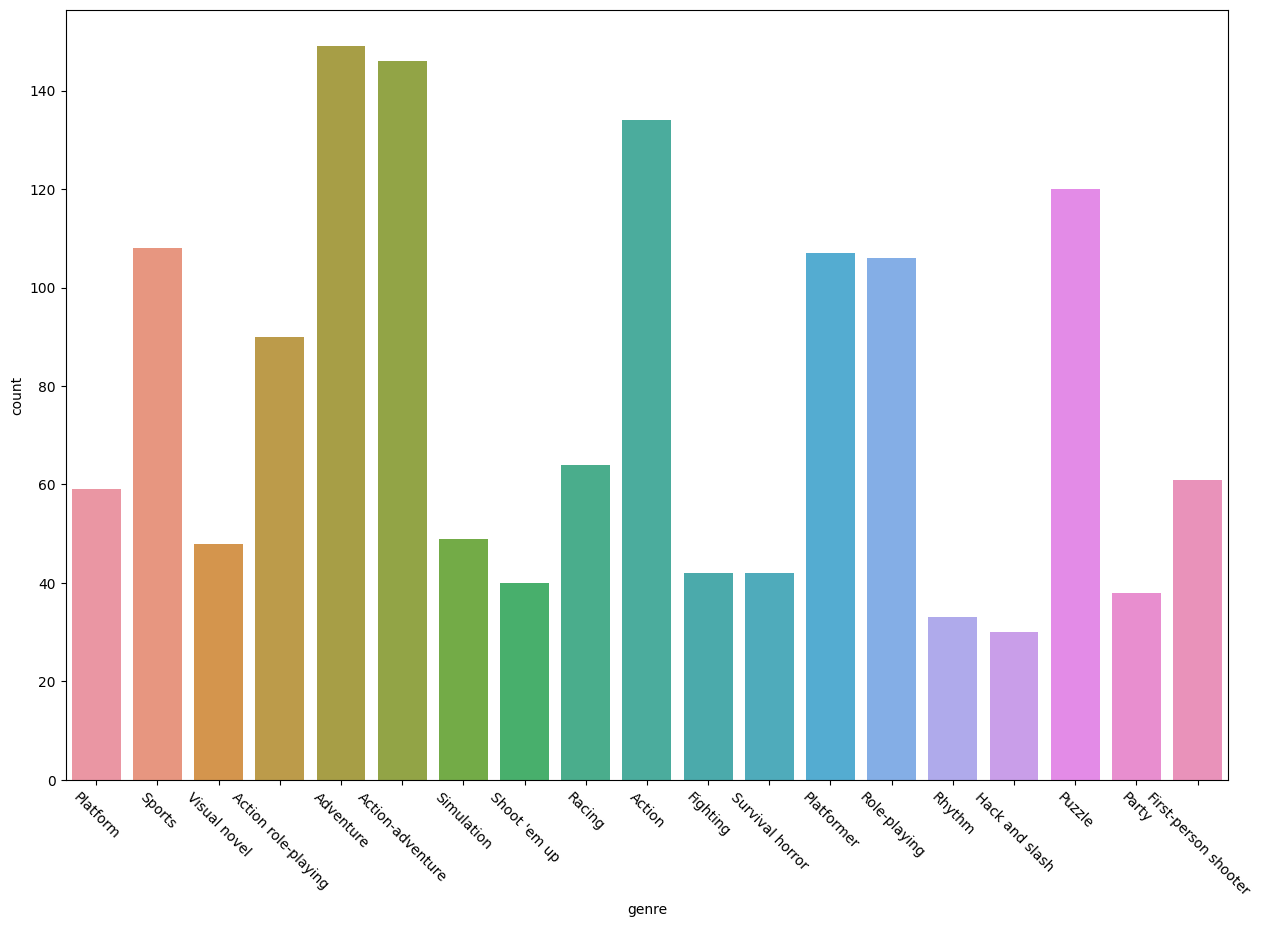

In [62]:
juegos_genero(df)

In [63]:
def tarta_Comp(df):
    
    x=pd.DataFrame(df.Comp.value_counts())

    fig={'data':[{'values':x.Comp,'labels':x.index,'domain':{'x':[0,0.7]},'name':'','hoverinfo':'label+value','hole':0.5,'type':'pie'}],
         'layout':{'title':'Región de Lanzamiento de juegos'}}
    iplot(fig)


In [64]:
tarta_Comp(df)

In [65]:

import sqlite3
cnx = sqlite3.connect(':memory:')
x=pd.DataFrame(df.Comp.value_counts())
x['Regiones']=x.index
x.to_sql(name='x',con=cnx,if_exists='append', index=False)

def sql_query(query):
    return pd.read_sql(query,cnx)

In [66]:
query='''
SELECT*
FROM x
 '''
sql_query(query)

,Comp,Regiones
0,1914,NA EU AU
1,1376,NA EU JP AU
2,373,EU AU
3,259,JP AU
4,193,NA
5,71,AU
6,53,NA JP
7,35,JP
8,7,EU JP AU


In [67]:
query='''
SELECT*
FROM x
WHERE NOT (Regiones LIKE '%EU%') AND Regiones LIKE '%NA%'
 '''
sql_query(query)

,Comp,Regiones
0,193,NA
1,53,NA JP


In [68]:
query='''
SELECT*
FROM x
WHERE NOT (Regiones like '%NA%')  AND Regiones LIKE '%EU%' '''
sql_query(query)

,Comp,Regiones
0,373,EU AU
1,7,EU JP AU


In [69]:
cnx = sqlite3.connect(':memory:')
x=pd.DataFrame(df.Comp.value_counts())
x['Regiones']=x.index
x.to_sql(name='x',con=cnx,if_exists='append', index=False)

def sql_query(query):
    return pd.read_sql(query,cnx)

query='''
SELECT*
FROM x
 '''
print(sql_query(query))

query='''
SELECT*
FROM x
WHERE NOT (Regiones LIKE '%EU%') AND Regiones LIKE '%NA%'
 '''
print(sql_query(query))
query='''
SELECT*
FROM x
WHERE NOT (Regiones LIKE '%NA%')  AND Regiones LIKE '%EU%' '''
print(sql_query(query))
query='''
SELECT*
FROM x
WHERE Regiones LIKE '%NA%' OR Regiones LIKE '%EU%' '''
print(sql_query(query))

   Comp     Regiones
0  1914     NA EU AU
1  1376  NA EU JP AU
2   373        EU AU
3   259        JP AU
4   193           NA
5    71           AU
6    53        NA JP
7    35           JP
8     7     EU JP AU
   Comp Regiones
0   193       NA
1    53    NA JP
   Comp  Regiones
0   373     EU AU
1     7  EU JP AU
   Comp     Regiones
0  1914     NA EU AU
1  1376  NA EU JP AU
2   373        EU AU
3   193           NA
4    53        NA JP
5     7     EU JP AU
